# `eMbed Workshop`

In [1]:
# ### Installing required libraries
!pip install pyspark
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importing Libraries
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# Create a SparkSession
spark = SparkSession.builder.master("local").appName("Test").getOrCreate()

23/05/10 04:33:32 WARN Utils: Your hostname, srithanujan-ThinkBook-15-G2-ITL resolves to a loopback address: 127.0.1.1; using 192.168.1.107 instead (on interface enxfcde56ff0106)
23/05/10 04:33:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/10 04:33:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/10 04:33:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
spark

In [5]:
# Load the Data set
price_table = './Datasets/biscuit_price.csv'
production_table = './Datasets/biscuit_production.csv'

In [6]:
# Load the Biscuit Price CSV file into a DataFrame
price_df = spark.read.csv(price_table, header=True, inferSchema=True)

# Load the Biscuit Production CSV file into a DataFrame
production_df = spark.read.csv(production_table, header=True, inferSchema=True)

In [7]:
# Rename the '_c0' column to 'month' in the price_df DataFrame
price_df = price_df.withColumnRenamed('_c0', 'month')

# Rename the '_c0' column to 'month' in the production_df DataFrame
production_df = production_df.withColumnRenamed('_c0', 'month')

In [8]:
labels = [('2000', '2000'), ('2001', '2001'), ('2002', '2002'), ('2003', '2003'), ('2004', '2004'), ('2005', '2005'), ('2006', '2006'), ('2007', '2007'), ('2008', '2008'), ('2009', '2009'), ('2010', '2010'), ('2011', '2011'), ('2012', '2012'), ('2013', '2013'), ('2014', '2014'), ('2015', '2015'), ('2016', '2016'), ('2017', '2017'), ('2018', '2018'), ('2019', '2019'), ('2020', '2020'), ('2021', '2021'), ('2022', '2022'), ('2023', '2023')]

In [9]:
### Get the Columns as rows function
def converted_df(dataframe, col_type_name):
    # Use a loop to create the labeled columns
    for i, (label, col_name) in enumerate(labels):
        dataframe = dataframe.withColumn(f'label{i+1}', F.array(F.lit(label), F.col(col_name)))

    # Combine the labeled columns into a single array column
    dataframe = dataframe.withColumn('labels', F.array(*[f'label{i+1}' for i in range(len(labels))]))

    # Explode the array column into individual rows
    dataframe = dataframe.selectExpr('*', 'explode(labels) as exploded')

    # Split the exploded column into separate columns
    dataframe = dataframe.selectExpr('*', 'exploded[0] as year', f'exploded[1] as {col_type_name}')

    # Drop intermediate columns if desired
    dataframe = dataframe.drop(*[f'label{i+1}' for i in range(len(labels))], 'labels', 'exploded')
    
    return dataframe

In [10]:
## convert `price_df`
price_str = 'price'
biscuit_price_df = converted_df(price_df, price_str)
biscuit_price_df = biscuit_price_df.select('year', 'month', 'price')

In [11]:
## convert `production_df` 
production_count_str = 'production_count'
biscuit_prod_count_df  = converted_df(production_df, production_count_str)
biscuit_prod_count_df = biscuit_prod_count_df.select('year', 'month', 'production_count')

In [12]:
## merge `production_df` & 'price_df'
prod_and_price_df = biscuit_price_df.join(biscuit_prod_count_df,["year","month"])

In [13]:
## Drop Duplicates & null rows
prod_and_price_df = prod_and_price_df.dropna() \
                                    .dropDuplicates()

### Convert `Pyspark` Dataframe to `Pandas` Dataframe
1. for the model training purpose

In [14]:
prod_and_price_df = prod_and_price_df.toPandas()

23/05/10 04:33:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
 Schema: _c0, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
Expected: _c0 but found: 
CSV file: file:///home/srithanujan/Desktop/Embed_Workshop/Embed_Workshop_Interview/Datasets/biscuit_price.csv
23/05/10 04:33:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
 Schema: _c0, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
Expected: _c0 but found: 
CSV file: file:///home/srithanujan/Desktop/Embed

In [15]:
# dataframe informations
prod_and_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              277 non-null    object
 1   month             277 non-null    object
 2   price             277 non-null    object
 3   production_count  277 non-null    object
dtypes: object(4)
memory usage: 8.8+ KB


In [16]:
# Convert the datatypes of columns to train the dataset
prod_and_price_df = prod_and_price_df.astype({"year":"int","production_count":"float", "price": "float", "month": "str"})

In [17]:
# Check the columns datypes converted or not
prod_and_price_df.dtypes

year                  int64
month                object
price               float64
production_count    float64
dtype: object

## Model Training - `Linear Regression`

In [18]:
# Split the data into training and test sets
train = prod_and_price_df[prod_and_price_df['year'] < 2022]
test = prod_and_price_df[prod_and_price_df['year'] == 2022]

In [19]:
# Define the features (X) and the target variable (y)
X_train = train[['production_count', 'month']]
X_test = test[['production_count', 'month']]
y_train = train['price']
y_test = test['price']

In [20]:
# Convert the month column to numerical values
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
X_train['month'] = X_train['month'].map(month_mapping)
X_test['month'] = X_test['month'].map(month_mapping)

/tmp/ipykernel_8504/4030147703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month'] = X_train['month'].map(month_mapping)
/tmp/ipykernel_8504/4030147703.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['month'] = X_test['month'].map(month_mapping)


In [21]:
# Train the regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f'R^2 score: {score:.2f}')

R^2 score: -11.54


In [23]:
# Use the trained model to make predictions on the 2023 Feb data
X_pred = pd.DataFrame({
    'production_count': [203.99],
    'month': [2]
})

In [24]:
y_pred = model.predict(X_pred)
print(f'Predicted price for Feb 2023: {y_pred[0]:.2f}')

Predicted price for Feb 2023: 23.74


#### Plot Actual & Predicted Prices

Predicted price for Feb 2023: 23.74


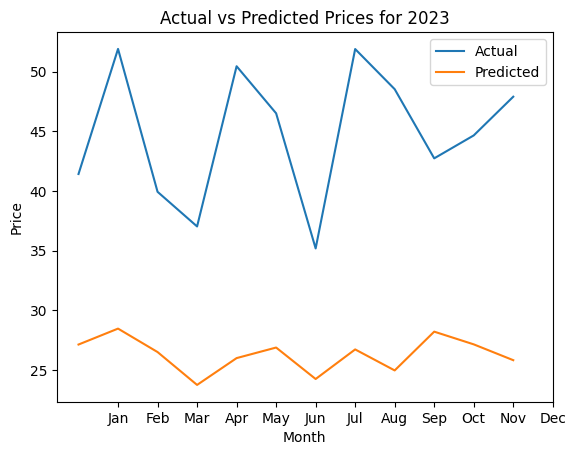

In [25]:
# Predict the prices for the entire test set
y_pred_test = model.predict(X_test)

# Combine the predicted and actual prices into a single dataframe
test_results = test.copy()
test_results['predicted_price'] = y_pred_test

# Create a line graph of the predicted and actual prices
plt.plot(test_results['month'], test_results['price'], label='Actual')
plt.plot(test_results['month'], test_results['predicted_price'], label='Predicted')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for 2023')
plt.legend()
y_pred = model.predict(X_pred)
print(f'Predicted price for Feb 2023: {y_pred[0]:.2f}')
plt.show()